### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [ ]:
# Puedes incluir más librerías, de ser necesario:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from google.colab import drive
import os

# Google Colab Mount
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/IA"
os.chdir(DIR)

# Si se desean comentar algunos de los Warnings.
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



El método de curvas de aprendizaje es una técnica que se utiliza para evaluar el rendimiento en los modelos de machine learning a medida que se aumenta la cantidad de datos en el entrenamiento.

El método de curvas de aprendizaje para monitorear los siguientes patrones:
* En el subrentrenamiento las curvas covergen un bajo rendimiento tanto el
  conjunto de entrenamiento como en el
   conjunto de prueba. Las curvas de aprendizaje en este modelo es simple para capturar la estructura de los datos.
* En el sobrentrenamiento si existe una gran brecha entre las curvas de entrenamiento y prueba, tiene un alto rendimiento en el conjunto de entrenamiento pero un rendimiento menor en el conjunto de prueba.


## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


El objetivo del artículo es desarrollar un modelo para predecir el rating de las publicaciones en Facebook de las diferentes marcas.


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

#### **Variables de Entrada**

**1.** **Page total likes:** número de personas que han dado "me gusta" a la página de la empresa. **Tipo de variable:** numérica.

**2.** **Type:** tipo de contenido publicado (Enlace, Foto, Estado, Video). **Tipo de variable:** categórico.

**3.** **Category**: caracterización manual del contenido: acción (ofertas especiales y concursos), producto (publicidad directa, contenido explícito de la marca) e inspiración (contenido relacionado con la marca no explícito). **Tipo de variable:** categórico.

**4.** **Post month:** mes en que se publicó la publicación. **Tipo de variable:** numérica.

**5.** **Post weekday:** día de la semana en que se publicó la publicación. **Tipo de variable:** númerica.

**6.** **Post hour:** hora en que se publicó la publicación. **Tipo de variable:** numérica.


**7.** **Paid:** si la empresa pagó a Facebook por publicidad. **Tipo de variable:** categórica (0: no, 1: sí)


### **Variable de Salida**

8. **Total Interactions:** la suma de "likes", "comments" y "shares" de la publicación. **Tipo de variable:** numérica.

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [ ]:
# Cargamos los datos:
data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Encontrar valores nulos antes de eliminar filas
print("Valores nulos en X antes de eliminar filas:")
print(X.isnull().sum())

print("\nValores nulos en y antes de eliminar filas:")
print(y.isnull().sum())

# Eliminar filas con valores nulos
X.dropna(axis=0, inplace=True)
y = y.iloc[X.index]  # Ajustamos y en función de las filas eliminadas en X

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Valores nulos en X antes de eliminar filas:
Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                1
dtype: int64

Valores nulos en y antes de eliminar filas:
Lifetime Post Consumers    0
dtype: int64
Train: (299, 7) (299, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [ ]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [ ]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,299.0,123583.826087,16199.001854,81370.0,113028.0,130791.0,136393.0,139441.0
Type,299.0,1.214047,0.574342,1.0,1.0,1.0,1.0,4.0
Category,299.0,1.916388,0.857086,1.0,1.0,2.0,3.0,3.0
Post Month,299.0,7.113712,3.314668,1.0,4.0,7.0,10.0,12.0
Post Weekday,299.0,4.193980,1.992224,1.0,3.0,4.0,6.0,7.0
Post Hour,299.0,7.702341,4.325090,1.0,3.0,9.0,11.0,22.0
Paid,299.0,0.307692,0.462312,0.0,0.0,0.0,1.0,1.0


In [ ]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,299.0,822.190635,1006.404471,9.0,322.5,548.0,992.0,11328.0


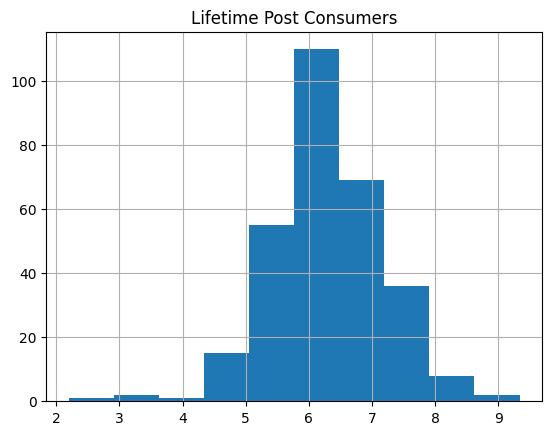

In [ ]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [ ]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [ ]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [ ]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1004.720
Desv-Est y-logaritmo: 0.892


## **Ejercicio 3**


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'m__n_estimators': 500, 'm__min_samples_split': 10, 'm__min_samples_leaf': 1, 'm__max_features': 'sqrt', 'm__max_depth': 10, 'm__bootstrap': True}


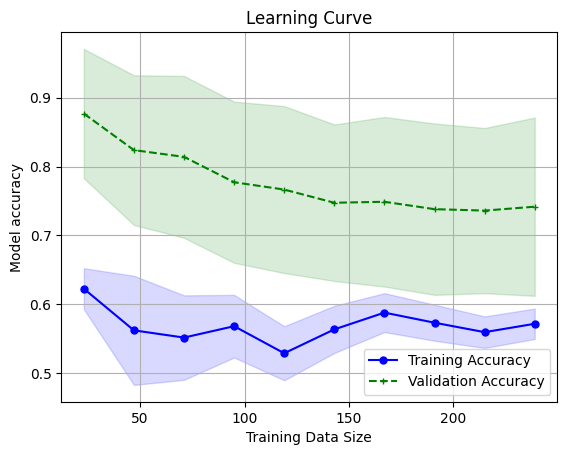

In [ ]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
param_distributions = {
    'm__n_estimators': [100, 200, 300, 400, 500],
    'm__max_features': ['auto', 'sqrt', 'log2'],
    'm__max_depth': [10, 20, 30, 40, 50, None],
    'm__min_samples_split': [2, 5, 10],
    'm__min_samples_leaf': [1, 2, 4],
    'm__bootstrap': [True, False]
}
elmodelo_RF = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator=Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_RF)]),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='neg_mean_squared_error')

random_search.fit(Xtrain, np.ravel(ytrainlog))

print("Best parameters found: ", random_search.best_params_)

elmodelo_RF = random_search.best_estimator_.named_steps['m']

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
best_params = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 50,
    'bootstrap': True
}

elmodelo_RF = RandomForestRegressor(**best_params)
# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.689


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

#modelo XGBoost
elmodelo_XGB = XGBRegressor()

#hiperparámetros a buscar
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

#realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_XGB = GridSearchCV(estimator=elmodelo_XGB, param_grid=param_grid_XGB, cv=5, scoring='neg_mean_squared_error')
grid_search_XGB.fit(Xtrain, np.ravel(ytrainlog))

#obtiene los mejores hiperparámetros
best_params_XGB = grid_search_XGB.best_params_
print("Best parameters found for XGBoost:", best_params_XGB)

Best parameters found for XGBoost: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}


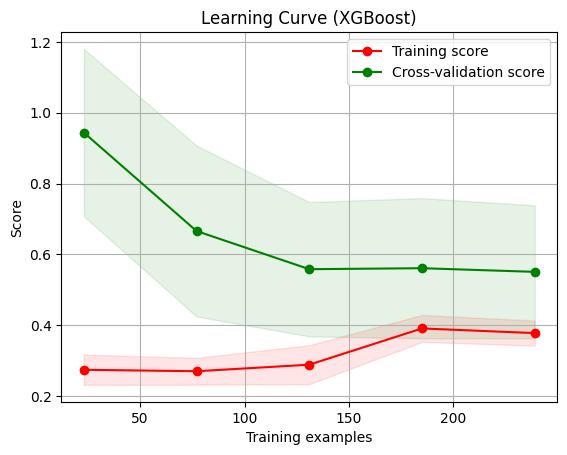

Error RSME(Test) de XGBoost: 0.688


In [ ]:
# XGBoost
elmodelo_XGB = XGBRegressor(**best_params_XGB)
mipipe_XGB = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])
mipipe_XGB.fit(Xtrain, np.ravel(ytrainlog))
#curva
plot_learning_curve(mipipe_XGB, "Learning Curve (XGBoost)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()
yhattest_XGB = mipipe_XGB.predict(Xtest)
print('Error RSME(Test) de XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB)))

In [ ]:
from sklearn.svm import SVR

#el modelo SVM
elmodelo_SVM = SVR()

#hiperparámetros a buscar
param_grid_SVM = {
    'kernel': ['rbf','sigmoid'],
    'gamma': ['scale'],
    'C': [0.1, 1, 10, 100],  # Reducir el rango de valores para C
}

#realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_SVM = GridSearchCV(estimator=elmodelo_SVM, param_grid=param_grid_SVM, cv=5, scoring='neg_mean_squared_error')
grid_search_SVM.fit(Xtrain, np.ravel(ytrainlog))

#obtiene los mejores hiperparámetros
best_params_SVM = grid_search_SVM.best_params_
print("Best parameters found for SVM:", best_params_SVM)

Best parameters found for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


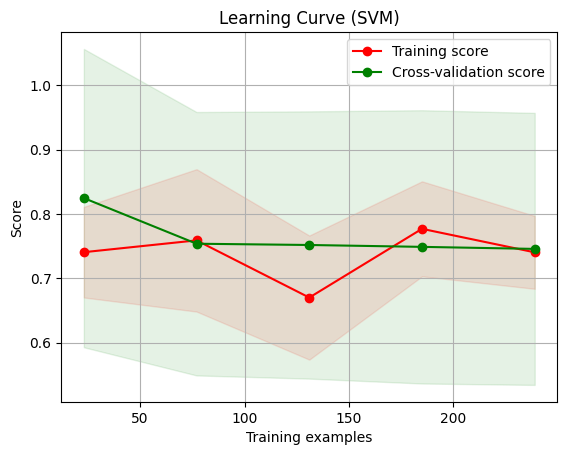

Error RSME(Test) de SVM: 0.897


In [ ]:
#SVM
elmodelo_SVM = SVR(**best_params_SVM)
mipipe_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])
mipipe_SVM.fit(Xtrain, np.ravel(ytrainlog))
#curva
plot_learning_curve(mipipe_SVM, "Learning Curve (SVM)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()
yhattest_SVM = mipipe_SVM.predict(Xtest)
print('Error RSME(Test) de SVM: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM)))


In [ ]:
from sklearn.neural_network import MLPRegressor

# Define el modelo MLP
elmodelo_MLP = MLPRegressor()

# Define la grilla de hiperparámetros a buscar
param_grid_MLP = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search_MLP = GridSearchCV(estimator=elmodelo_MLP, param_grid=param_grid_MLP, cv=5, scoring='neg_mean_squared_error')
grid_search_MLP.fit(Xtrain, np.ravel(ytrainlog))

# Obtiene los mejores hiperparámetros
best_params_MLP = grid_search_MLP.best_params_
print("Best parameters found for MLP:", best_params_MLP)

Best parameters found for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


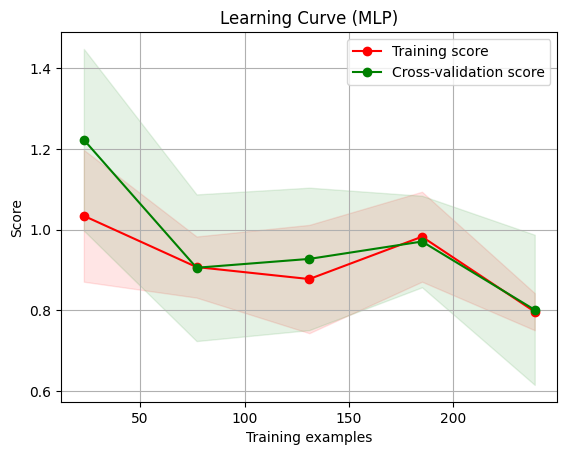

Error RSME(Test) de MLP: 0.889


In [ ]:
# MLP
elmodelo_MLP = MLPRegressor(**best_params_MLP)
mipipe_MLP = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])
mipipe_MLP.fit(Xtrain, np.ravel(ytrainlog))
#curva
plot_learning_curve(mipipe_MLP, "Learning Curve (MLP)", Xtrain, np.ravel(ytrainlog), cv=5)
plt.show()
yhattest_MLP = mipipe_MLP.predict(Xtest)
print('Error RSME(Test) de MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

El RMSE es una métrica que mide la cantidad de errores que hay entres  dos conjuntos de datos. Nos permitió comparar el mejor resultado obtenido entre los 3 modelos sugeridos.

MLP se entrena de manera iterativa, funciona de manera optima en matices densas y dispersas de valores flotantes sin embargo fue uno de los modelos con un puntaje mayor en el error cuadático
con un puntaje de 0.88

SVM es un algortimo de aprendizaje optimo para clasificación y regresión en aplicaciones médicas como el reconocimiento de imágenes, sin embargo para el caso de Facebook no fue optimo este modelo obtuvo el puntaje más alto en el RMSE con 0.89

El mejor modelo fue el XGBoost ya que al cálcular el error RSME fue el que obtuvo el puntaje más bajo con un 0.68

XGBoost mejora el rendimiento en la gran mayoría de los algoritmos. El XGBoost es recomendable utilizarlo para datasets grandes con más de 1000 observaciones como en el caso del ánalisis de publicaciones de Facebook.